## Baseline Scenario

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


In [3]:
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
import time

# Reset environment and initialize variables
done = False
obs, info = env.reset()
all_kpi_means = []  # List to store mean metrics for each episode
episode_infos = []

# Run for 100 time steps for 100 episodes
for episode in range(100):
    obs, info = env.reset()
    print(f"Starting Episode {episode + 1}")
    episode_start_time = time.time()  # Start timing the episode

    for t in range(100):
        # Perform dummy action
        dummy_action = env.action_space.sample()
        #dummy_action = (0.50, 0.50)
        obs, reward, terminated, truncated, info = env.step(dummy_action)

        # Check termination condition
        if terminated or truncated:
            break
    
    # Calculate and store the episode duration
    episode_duration = time.time() - episode_start_time
    print(f"Completed Episode {episode + 1}: {episode_duration}")

    # Load results after the episode
    _, kpi_results, _, _, _ = env.monitor.load_results()

    # Compute mean of metrics over the episode
    kpi_mean = kpi_results.mean()  # Calculate mean for each metric
    all_kpi_means.append(kpi_mean)

    # Add episode-level information to the list
    episode_info = {
        "Episode": episode + 1,
        "Total Reward": info.get("episode reward"),
        "Queue Size Transferred Jobs UE": info.get("bs trans. ue"),
        "Queue Size Transferred Jobs Sensor": info.get("bs trans. ss"),
        "Queue Size Accomplished Jobs UE": info.get("bs accomp. us"),
        "Queue Size Accomplished Jobs Sensor": info.get("bs accomp. ss"),
    }
    episode_infos.append(episode_info)

    print(f"Mean Reward for Episode: {episode_info['Total Reward']/100:.2f}")


# Convert all_kpi_means and episode_infos to DataFrames
episode_infos_df = pd.DataFrame(episode_infos)
all_kpi_means_df = pd.DataFrame(all_kpi_means)

# Display mean KPI metrics for each episode
print(episode_infos_df)
print(all_kpi_means_df)

# Save results to CSV files
episode_infos_df.to_csv("episode_infos.csv", index=False)
all_kpi_means_df.to_csv("kpi_means_per_episode.csv", index=False)

Starting Episode 1
Completed Episode 1: 1.1981921195983887
Mean Reward for Episode: 3.42
Starting Episode 2
Completed Episode 2: 1.05918288230896
Mean Reward for Episode: 3.93
Starting Episode 3
Completed Episode 3: 1.019284963607788
Mean Reward for Episode: -1.52
Starting Episode 4
Completed Episode 4: 1.049375057220459
Mean Reward for Episode: 4.03
Starting Episode 5
Completed Episode 5: 1.0487480163574219
Mean Reward for Episode: 1.21
Starting Episode 6
Completed Episode 6: 1.0677340030670166
Mean Reward for Episode: 1.71
Starting Episode 7
Completed Episode 7: 1.0937490463256836
Mean Reward for Episode: -2.46
Starting Episode 8
Completed Episode 8: 1.1184778213500977
Mean Reward for Episode: 9.05
Starting Episode 9
Completed Episode 9: 1.0732150077819824
Mean Reward for Episode: -1.14
Starting Episode 10
Completed Episode 10: 1.1152269840240479
Mean Reward for Episode: 0.69
Starting Episode 11
Completed Episode 11: 1.0989470481872559
Mean Reward for Episode: 12.34
Starting Episode 

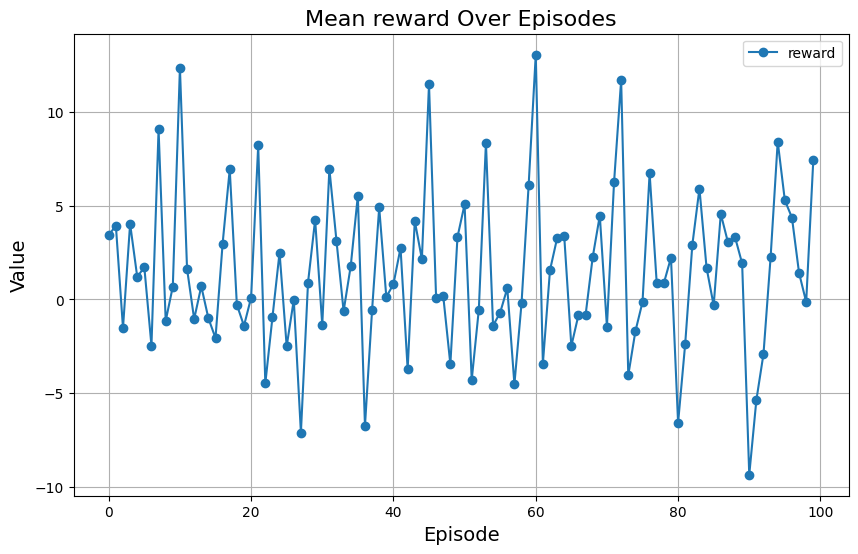

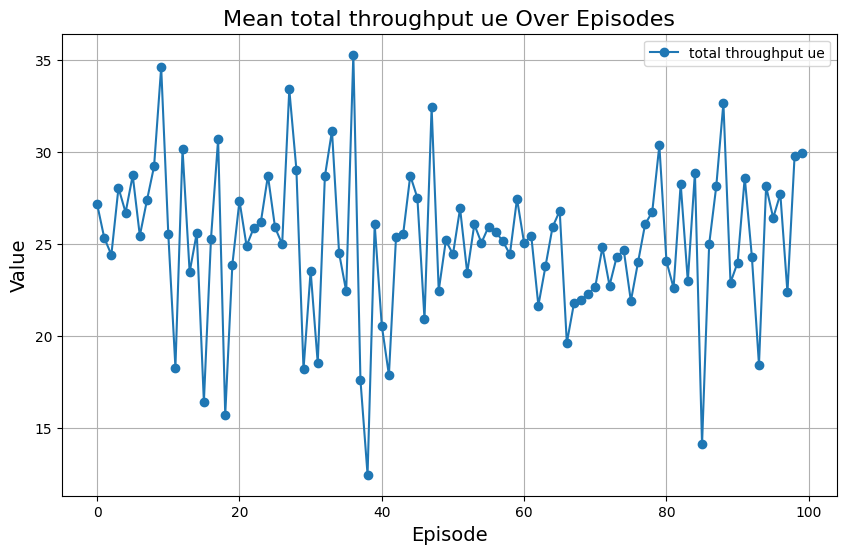

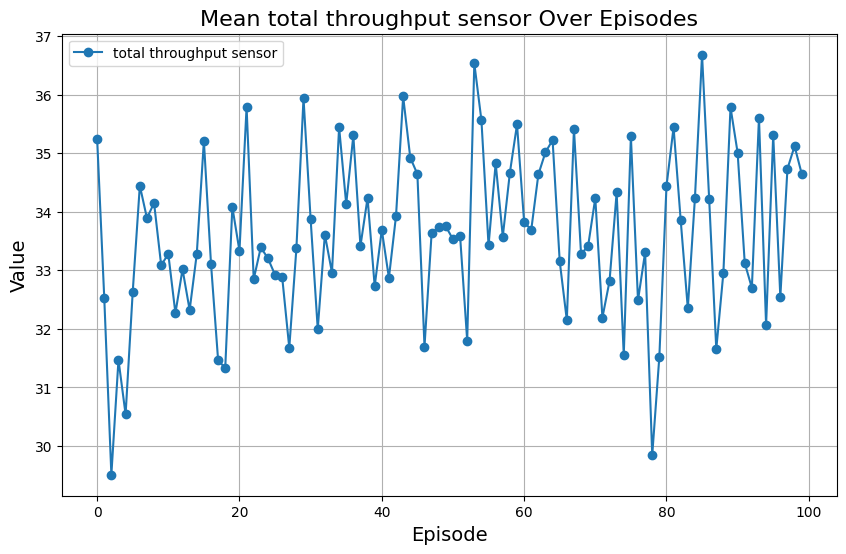

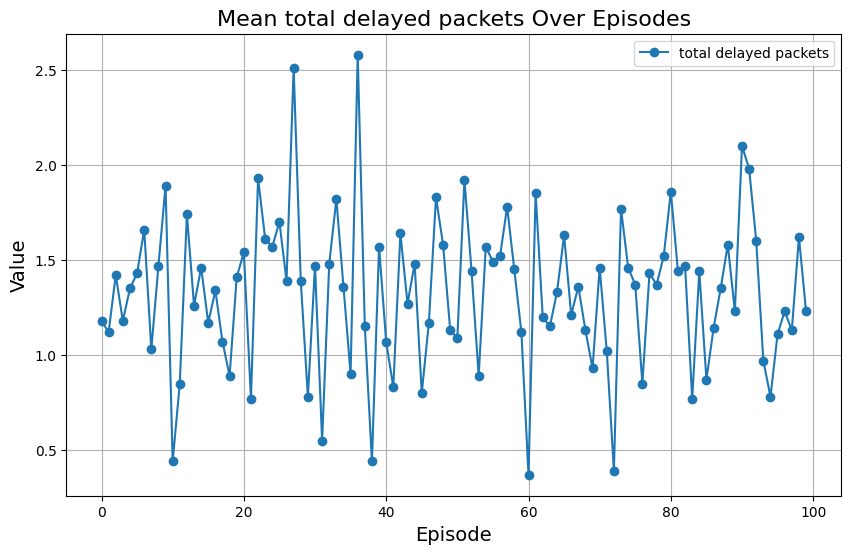

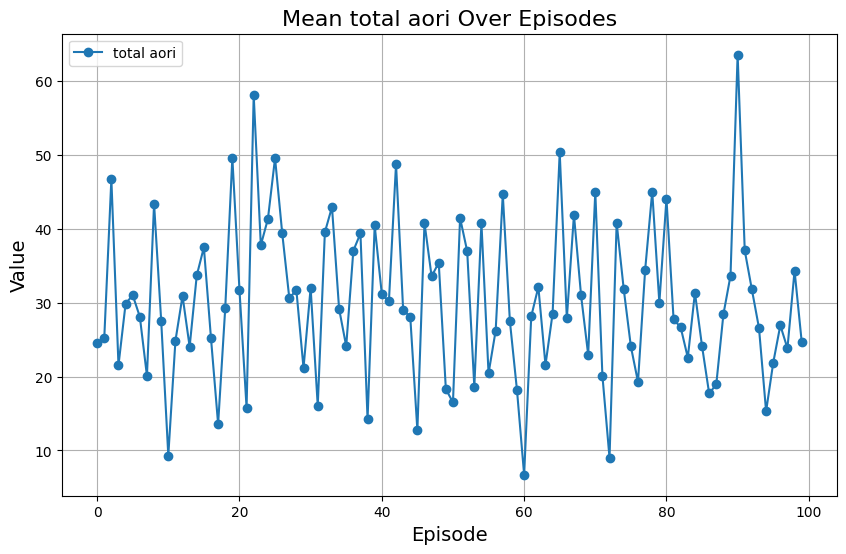

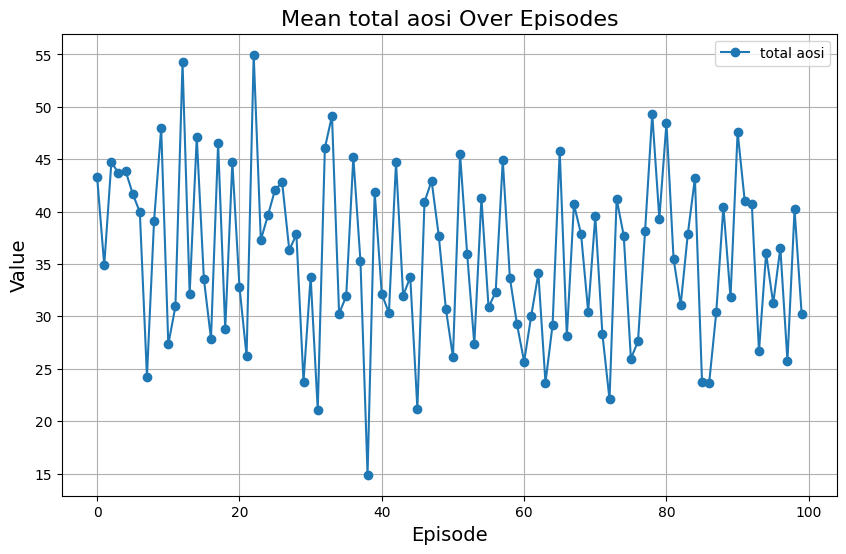

In [4]:
# Plot each metric in a separate plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

for metric in required_metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(all_kpi_means_df.index, all_kpi_means_df[metric], marker='o', label=metric)
    plt.title(f"Mean {metric} Over Episodes", fontsize=16)
    plt.xlabel("Episode", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

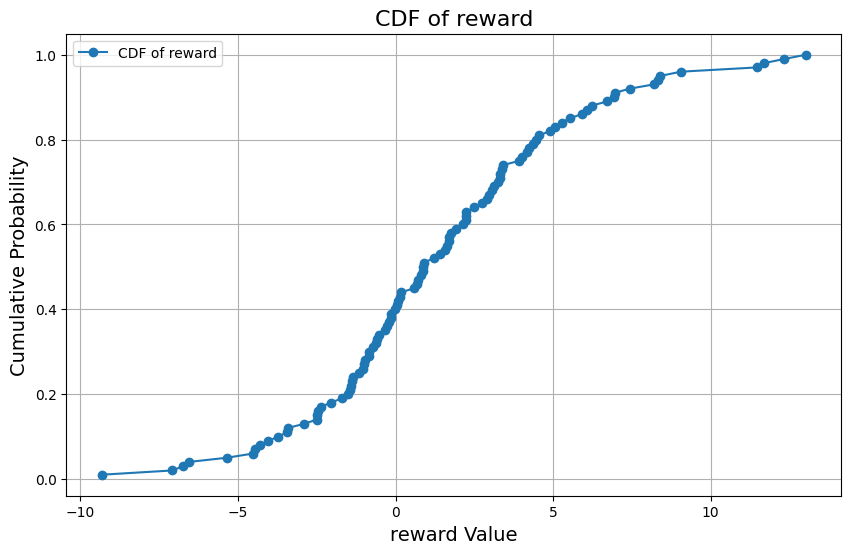

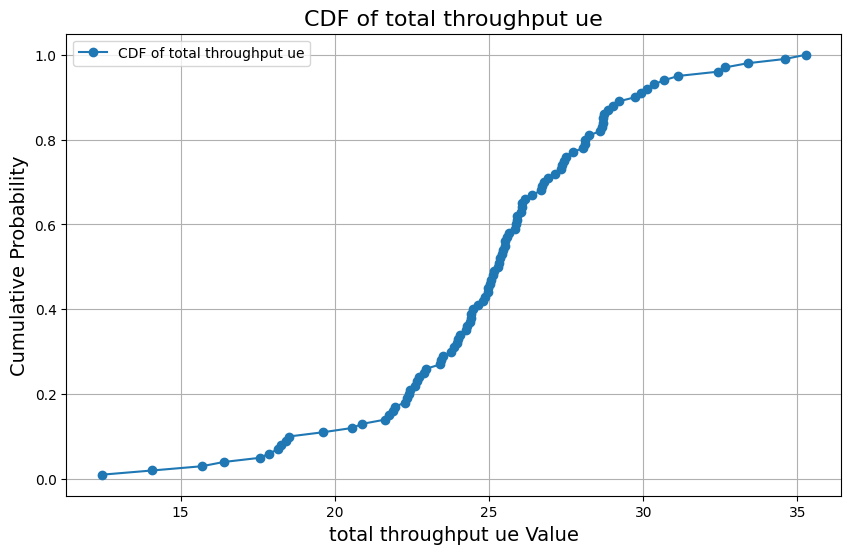

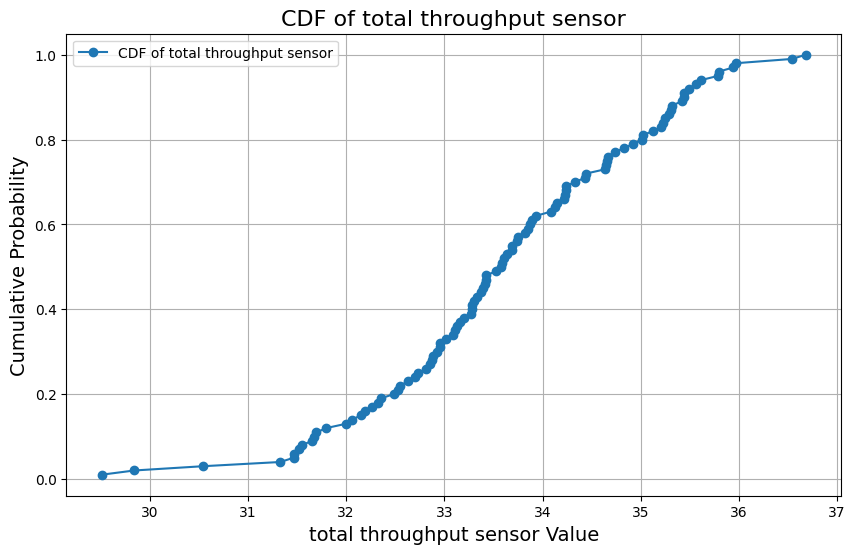

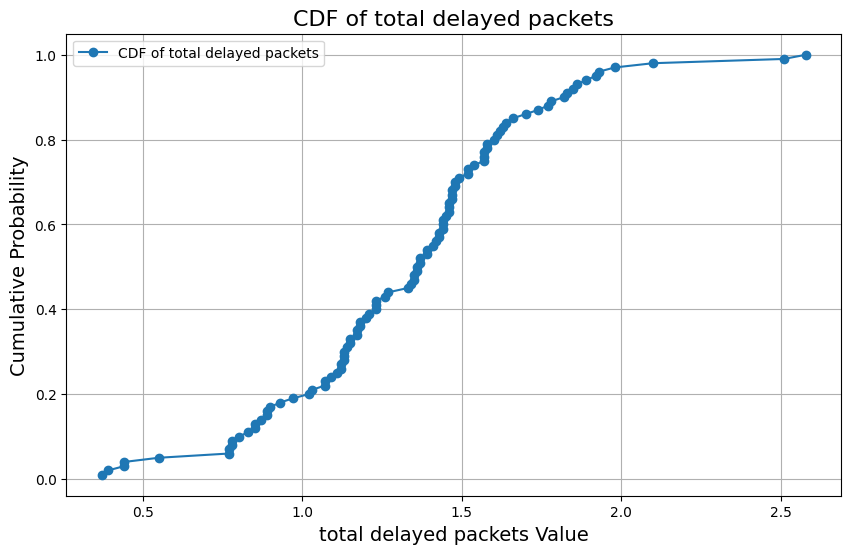

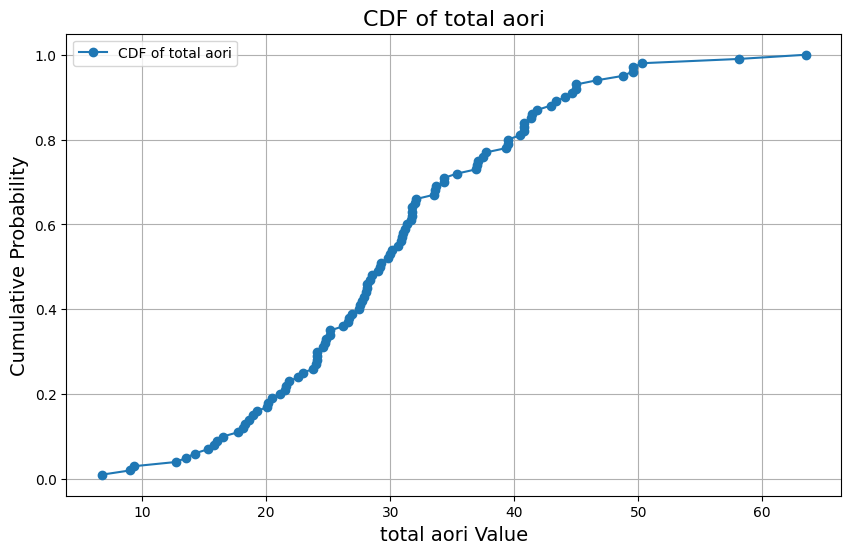

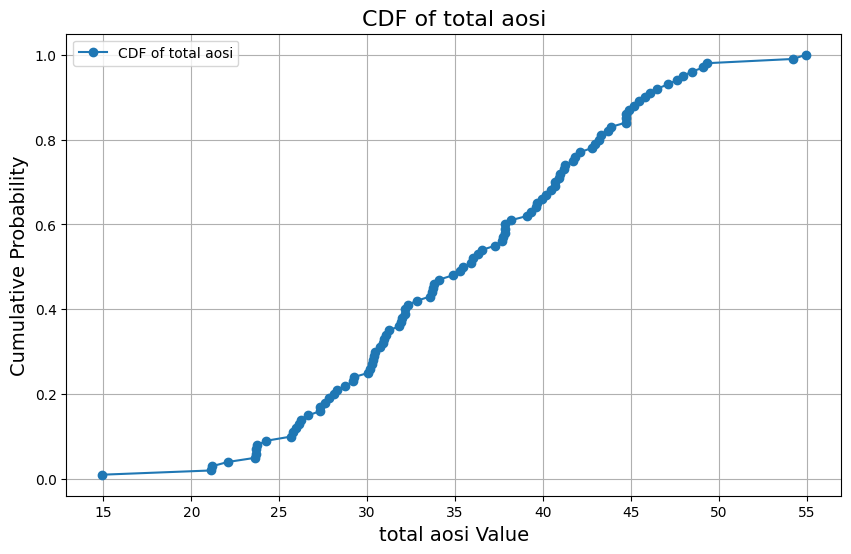

In [5]:
import numpy as np

# Function to calculate and plot the CDF for each metric
def plot_cdf_metrics(metrics_df, metrics_list):
    for metric in metrics_list:
        plt.figure(figsize=(10, 6))
        
        # Get the values for the metric
        metric_values = metrics_df[metric].dropna().values  # Drop NaN values
        
        # Sort the values and compute the CDF
        sorted_values = np.sort(metric_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        
        # Plot the CDF
        plt.plot(sorted_values, cdf, marker='o', label=f"CDF of {metric}")
        plt.title(f"CDF of {metric}", fontsize=16)
        plt.xlabel(f"{metric} Value", fontsize=14)
        plt.ylabel("Cumulative Probability", fontsize=14)
        plt.grid(True)
        plt.legend()
        plt.show()

# Metrics to plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

# Call the CDF plot function
plot_cdf_metrics(all_kpi_means_df, required_metrics)
